In [79]:
#Importando base de dados
import pandas as pd
base_dados = pd.read_csv("C:/Users/MuriloFarias/Meu Drive/Geral/murilo/Pós Graduação/EXTRA/DSA/Power BI Para Business/LIMPEZA E TRATAMENTO/Clientes.csv")
#imprimindo cabeçalho
print(base_dados.head())

   ID_Cliente  Idade   Peso  Altura Estado Civil          Cidade Estado  \
0           1   34.0   98.0     184       Casado       São Paulo     RS   
1           2   28.0  105.0     184       Casado       São Paulo     RJ   
2           3    NaN   44.0     178   Divorciado       São Paulo     RJ   
3           4   33.0   84.0     164   Divorciado       São Paulo     SP   
4           5   56.0    NaN     189   Divorciado  Rio de Janeiro     RJ   

   Limite de Crédito  Taxa de Desconto Tipo de Cliente  
0                581                 6        Diamante  
1               4537                 4            Ouro  
2               2977                 5           Prata  
3               7462                 3           Prata  
4               3766                 3          Bronze  


In [80]:
#Verificando tipo de dados
print(base_dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Cliente         502 non-null    int64  
 1   Idade              498 non-null    float64
 2   Peso               498 non-null    float64
 3   Altura             502 non-null    int64  
 4   Estado Civil       502 non-null    object 
 5   Cidade             502 non-null    object 
 6   Estado             502 non-null    object 
 7   Limite de Crédito  502 non-null    int64  
 8   Taxa de Desconto   502 non-null    int64  
 9   Tipo de Cliente    502 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 39.3+ KB
None


In [81]:
#verificando linhas em branco
base_dados.isnull().sum()

ID_Cliente           0
Idade                4
Peso                 4
Altura               0
Estado Civil         0
Cidade               0
Estado               0
Limite de Crédito    0
Taxa de Desconto     0
Tipo de Cliente      0
dtype: int64

In [82]:
#quantidade de linhas e colunas
base_dados.shape

(502, 10)

In [83]:
#Removendo valores em branco
nova_base_dados = base_dados.dropna()

In [84]:
print(nova_base_dados.info())

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 0 to 501
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Cliente         494 non-null    int64  
 1   Idade              494 non-null    float64
 2   Peso               494 non-null    float64
 3   Altura             494 non-null    int64  
 4   Estado Civil       494 non-null    object 
 5   Cidade             494 non-null    object 
 6   Estado             494 non-null    object 
 7   Limite de Crédito  494 non-null    int64  
 8   Taxa de Desconto   494 non-null    int64  
 9   Tipo de Cliente    494 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 42.5+ KB
None


In [17]:
#quantidade de linhas e colunas
nova_base_dados.shape

(494, 10)

In [85]:
#Verificando valores duplicados da coluna ID_Cliente
num_duplicados = nova_base_dados['ID_Cliente'].duplicated().sum()
print("Número de valores duplicados:", num_duplicados)


Número de valores duplicados: 6


In [86]:
#Removendo valores duplicados da coluna ID_Cliente
nova_base_dados = nova_base_dados.drop_duplicates(subset=['ID_Cliente'])


In [87]:
#quantidade de linhas e colunas
nova_base_dados.shape

(488, 10)

In [88]:
#transformando a coluna ID_Cliente de tipo int64 para object
nova_base_dados['ID_Cliente'] = nova_base_dados['ID_Cliente'].astype(str)
print(nova_base_dados.info())

<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 0 to 501
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Cliente         488 non-null    object 
 1   Idade              488 non-null    float64
 2   Peso               488 non-null    float64
 3   Altura             488 non-null    int64  
 4   Estado Civil       488 non-null    object 
 5   Cidade             488 non-null    object 
 6   Estado             488 non-null    object 
 7   Limite de Crédito  488 non-null    int64  
 8   Taxa de Desconto   488 non-null    int64  
 9   Tipo de Cliente    488 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 41.9+ KB
None


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
#Dividindo os valores coluna Altura por 100
nova_base_dados['Altura'] = nova_base_dados['Altura'] / 100


c:\Users\MuriloFarias\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


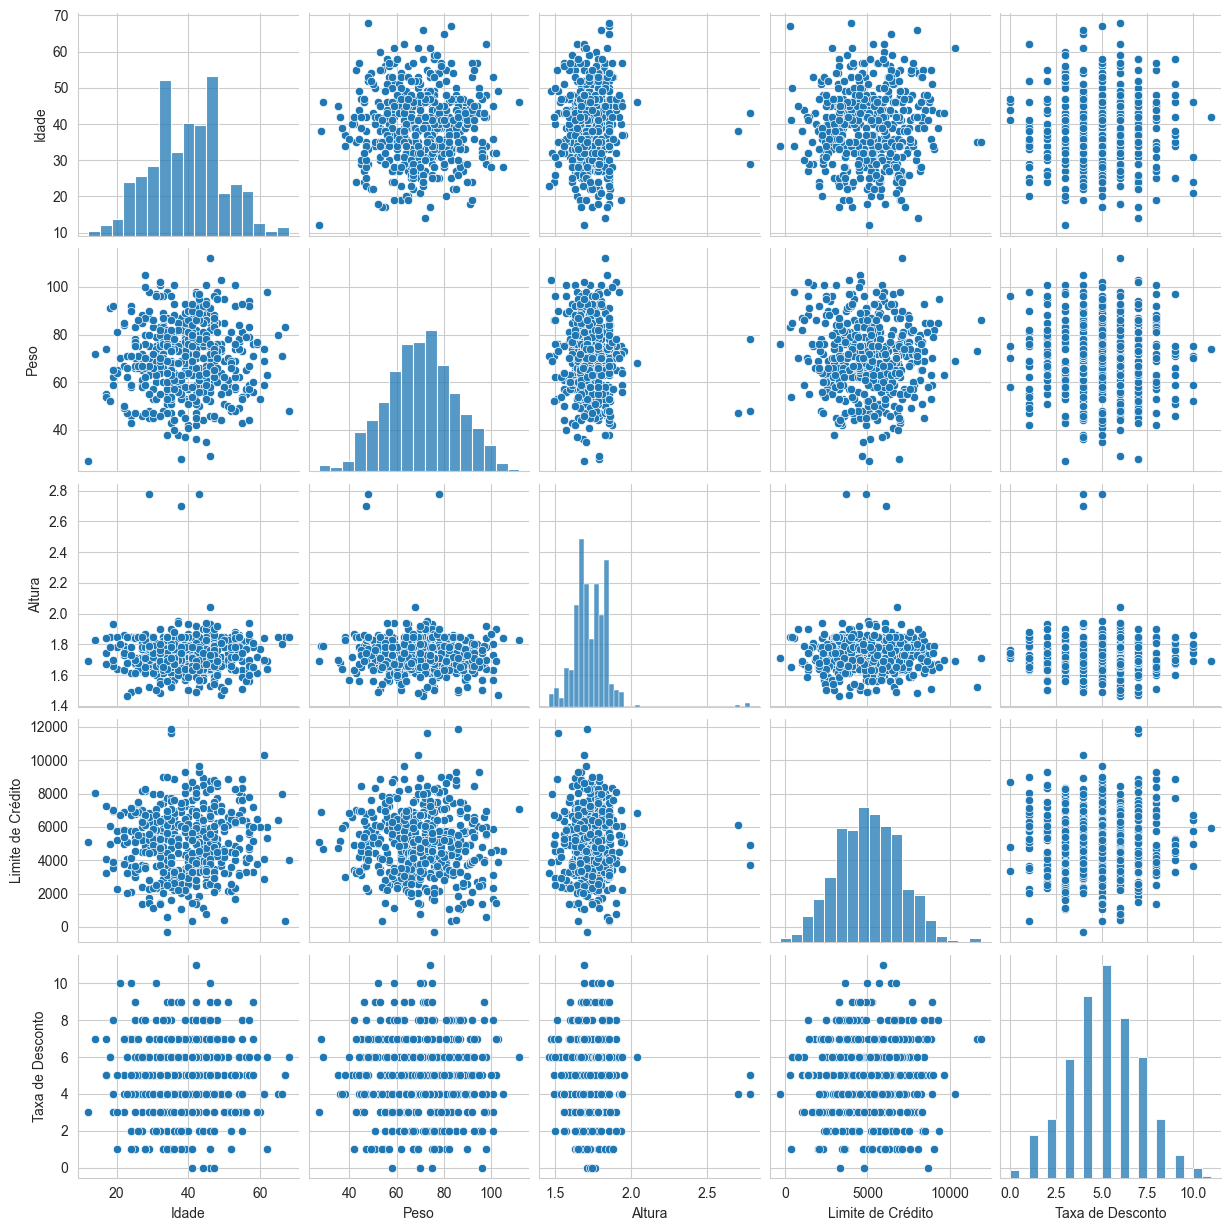

In [91]:
#grafico de disperção comparando as tipo numerico
sns.pairplot(nova_base_dados)
plt.show()

In [92]:
#Identificando Outlier Altura
analise_altura = nova_base_dados['Altura'].describe()
print('Analise da coluna Altura: \n', analise_altura)

Analise da coluna Altura: 
 count    488.000000
mean       1.735246
std        0.125685
min        1.460000
25%        1.667500
50%        1.720000
75%        1.800000
max        2.780000
Name: Altura, dtype: float64


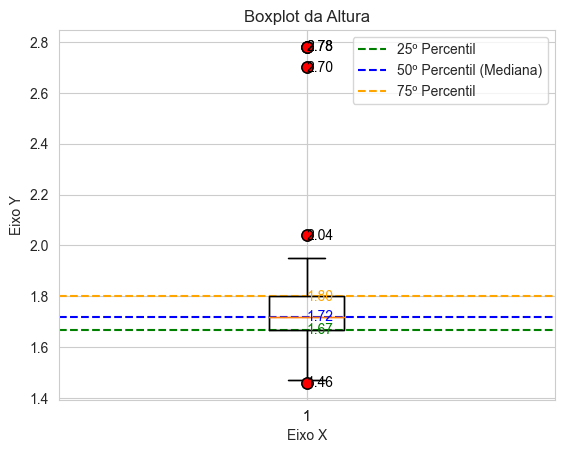

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Defina a configuração dos outliers
flierprops = {'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8}

# Dados de exemplo (substitua pelos seus dados)
altura_dados = nova_base_dados['Altura']

# Crie o boxplot com as personalizações
plt.boxplot(altura_dados, flierprops=flierprops)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Boxplot da Altura')

# Cálculo dos percentis
quartis = np.percentile(altura_dados, [25, 50, 75])

# Adicione as linhas de percentis
plt.axhline(y=quartis[0], color='green', linestyle='--', label='25º Percentil')
plt.axhline(y=quartis[1], color='blue', linestyle='--', label='50º Percentil (Mediana)')
plt.axhline(y=quartis[2], color='orange', linestyle='--', label='75º Percentil')

# Adicione rótulos de dados nos percentis
plt.text(1, quartis[0], f'{quartis[0]:.2f}', color='green', fontsize=10, va='center')
plt.text(1, quartis[1], f'{quartis[1]:.2f}', color='blue', fontsize=10, va='center')
plt.text(1, quartis[2], f'{quartis[2]:.2f}', color='orange', fontsize=10, va='center')

# Adicione rótulos de dados nos outliers (rótulos em preto)
outliers = plt.boxplot(altura_dados, flierprops=flierprops)['fliers'][0]
for outlier in outliers.get_ydata():
    plt.text(1, outlier, f'{outlier:.2f}', color='black', fontsize=10, va='center')

# Exiba o gráfico com a legenda
plt.legend()
plt.show()


In [94]:
#quantidade de linhas e colunas
nova_base_dados.shape

(488, 10)

In [95]:
print(nova_base_dados.info())

<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 0 to 501
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Cliente         488 non-null    object 
 1   Idade              488 non-null    float64
 2   Peso               488 non-null    float64
 3   Altura             488 non-null    float64
 4   Estado Civil       488 non-null    object 
 5   Cidade             488 non-null    object 
 6   Estado             488 non-null    object 
 7   Limite de Crédito  488 non-null    int64  
 8   Taxa de Desconto   488 non-null    int64  
 9   Tipo de Cliente    488 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 41.9+ KB
None


In [96]:
#Remover Outliers 2.78 e 2.70 coluna Altura
valores_para_remover = [2.78, 2.70]
nova_base_dados = nova_base_dados[~nova_base_dados['Altura'].isin(valores_para_remover)]

In [97]:
nova_base_dados.shape

(485, 10)

In [98]:
print(nova_base_dados)

    ID_Cliente  Idade   Peso  Altura Estado Civil          Cidade Estado  \
0            1   34.0   98.0    1.84       Casado       São Paulo     RS   
1            2   28.0  105.0    1.84       Casado       São Paulo     RJ   
3            4   33.0   84.0    1.64   Divorciado       São Paulo     SP   
5            6   28.0   80.0    1.73       Casado  Rio de Janeiro     SP   
6            7   53.0   74.0    1.77       Casado  Belo Horizonte     MG   
..         ...    ...    ...     ...          ...             ...    ...   
497        496   41.0   80.0    1.63        Viúvo  Belo Horizonte     RJ   
498        497   48.0   81.0    1.69   Divorciado    Porto Alegre     MG   
499        498   36.0   57.0    1.88     Solteiro       São Paulo     RS   
500        499   42.0   72.0    1.66     Solteiro    Porto Alegre     RS   
501        500   23.0   66.0    1.68        Viúvo  Rio de Janeiro     MG   

     Limite de Crédito  Taxa de Desconto Tipo de Cliente  
0                  581      

In [102]:
#Mostrar os valores distintos da coluna altura ordenado do menor para o maior
valores_distintos_altura = sorted(nova_base_dados['Altura'].unique())
print(valores_distintos_altura)

[1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.56, 1.57, 1.59, 1.6, 1.61, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.9, 1.92, 1.93, 1.94, 1.95, 2.04]


In [106]:
#ontando os valores distintos
valores_altura = nova_base_dados['Altura'].value_counts()
print(valores_altura)

Altura
1.85    48
1.78    36
1.69    28
1.67    25
1.71    22
1.74    21
1.72    21
1.63    20
1.79    17
1.65    17
1.70    17
1.66    16
1.68    13
1.64    13
1.77    13
1.61    12
1.84    12
1.83    12
1.73    12
1.81    11
1.80    11
1.76    11
1.56     7
1.57     6
1.90     6
1.59     6
1.60     6
1.82     6
1.87     5
1.86     4
1.52     4
1.50     4
1.93     3
1.54     3
1.49     3
1.94     3
1.88     2
1.92     2
2.04     1
1.47     1
1.51     1
1.53     1
1.46     1
1.48     1
1.95     1
Name: count, dtype: int64


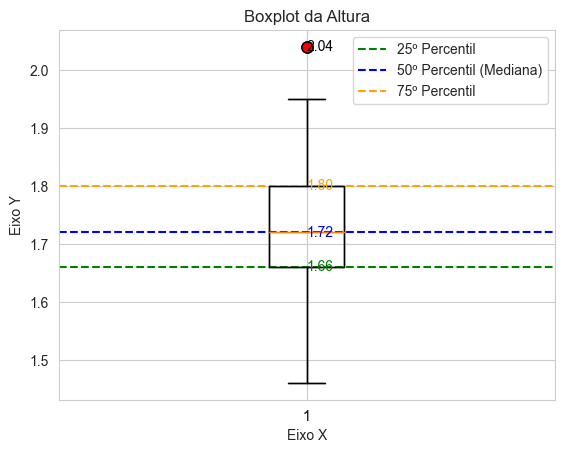

In [101]:
#novoBoxPlot sem os outliers

# Defina a configuração dos outliers
flierprops = {'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8}

# Dados de exemplo (substitua pelos seus dados)
altura_dados = nova_base_dados['Altura']

# Crie o boxplot com as personalizações
plt.boxplot(altura_dados, flierprops=flierprops)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Boxplot da Altura')

# Cálculo dos percentis
quartis = np.percentile(altura_dados, [25, 50, 75])

# Adicione as linhas de percentis
plt.axhline(y=quartis[0], color='green', linestyle='--', label='25º Percentil')
plt.axhline(y=quartis[1], color='blue', linestyle='--', label='50º Percentil (Mediana)')
plt.axhline(y=quartis[2], color='orange', linestyle='--', label='75º Percentil')

# Adicione rótulos de dados nos percentis
plt.text(1, quartis[0], f'{quartis[0]:.2f}', color='green', fontsize=10, va='center')
plt.text(1, quartis[1], f'{quartis[1]:.2f}', color='blue', fontsize=10, va='center')
plt.text(1, quartis[2], f'{quartis[2]:.2f}', color='orange', fontsize=10, va='center')

# Adicione rótulos de dados nos outliers (rótulos em preto)
outliers = plt.boxplot(altura_dados, flierprops=flierprops)['fliers'][0]
for outlier in outliers.get_ydata():
    plt.text(1, outlier, f'{outlier:.2f}', color='black', fontsize=10, va='center')

# Exiba o gráfico com a legenda
plt.legend()
plt.show()


In [30]:
#mantendo somente as colunas tipo numero
base_dados_numerica = nova_base_dados.drop(columns=['ID_Cliente', 'Estado Civil','Tipo de Cliente','Cidade','Estado'])
print(base_dados_numerica.info())


<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 0 to 501
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idade              488 non-null    float64
 1   Peso               488 non-null    float64
 2   Altura             488 non-null    float64
 3   Limite de Crédito  488 non-null    int64  
 4   Taxa de Desconto   488 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 22.9 KB
None


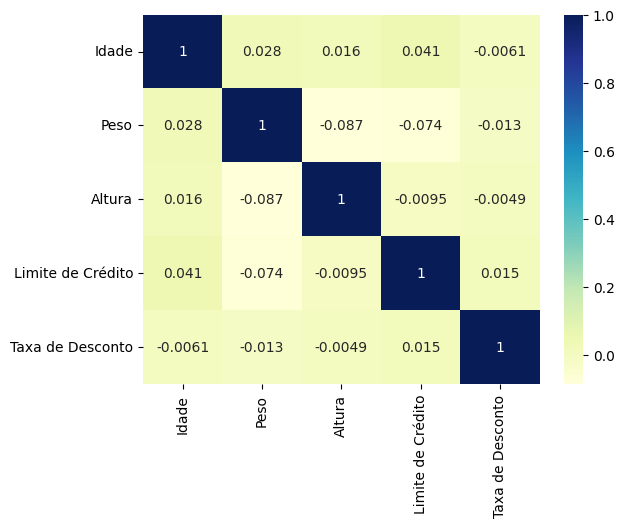

In [36]:

#Grafico de correlações
#cmap = indica paleta de cores , True significa que os numero devem aparecer no grafico

sns.heatmap(base_dados_numerica.corr(), cmap='YlGnBu', annot=True)
plt.show()


In [107]:
pip install fpdf


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40712 sha256=e859f4b3daa6d368bd9677fac459f3718d7db77cd1e958c59271576fc8e3b4c2
  Stored in directory: c:\users\murilofarias\appdata\local\pip\cache\wheels\65\4f\66\bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
from fpdf import FPDF

# Criando um objeto FPDF
pdf = FPDF()
pdf.add_page()

# Adicionando conteúdo ao PDF
pdf.set_font("Arial", size=12)
with open("codigo.ipynb", "r") as code_file:
    for line in code_file:
        pdf.cell(0, 10, line, ln=True)

# Salvando o PDF
pdf.output("codigo_em_pdf.pdf")


''